In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler



In [2]:
# Import the forums dataset.
forums = pd.read_pickle("forums.pkl")

In [3]:
forums.head(3)

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,...,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299
0,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Didn't one of the early jet fighters have thes...,-0.032947,0.120877,-0.075873,-0.076834,-0.005793,0.006867,-0.043206,-0.026466,0.005214,...,-0.207951,0.01521,0.031759,-0.070944,0.075598,-0.020428,-0.045896,-0.004107,0.052477,0.120896
2,"I bought my HP48sx calculator a month ago, use...",-0.057366,0.190520,-0.100694,-0.121314,0.073766,-0.007092,-0.047218,-0.166004,0.072910,...,-0.219416,-0.00675,-0.009741,-0.039333,-0.042368,-0.059894,-0.006622,-0.090851,0.045055,0.062297


In [4]:
forums.shape

(2362, 301)

In [5]:
forums.duplicated().sum()

56

In [6]:
forums.drop_duplicates(inplace=True)

In [7]:
forums.isna().sum()

text    0
e0      0
e1      0
e2      0
e3      0
       ..
e295    0
e296    0
e297    0
e298    0
e299    0
Length: 301, dtype: int64

In [8]:
forums.isna().sum().sum()

0

In [9]:
forums.dropna(inplace=True)

In [10]:
#from pandas_profiling import ProfileReport as pr
#profile = pr(forums, minimal=True).to_notebook_iframe()

In [11]:
forums.dtypes
forums.describe().T

,count,mean,std,min,25%,50%,75%,max
e0,2306.0,-0.037290,0.053681,-0.622081,-0.061726,-0.034597,-0.008594,0.197311
e1,2306.0,0.166673,0.057299,-0.196960,0.134074,0.165636,0.198776,0.533470
e2,2306.0,-0.117716,0.067673,-0.490025,-0.160749,-0.122530,-0.077692,0.363830
e3,2306.0,-0.061415,0.051222,-0.393122,-0.087629,-0.059283,-0.031056,0.322405
e4,2306.0,0.081012,0.053249,-0.163500,0.048218,0.078946,0.112331,0.390160
...,...,...,...,...,...,...,...,...
e295,2306.0,-0.014428,0.050466,-0.352770,-0.040343,-0.012247,0.014693,0.263430
e296,2306.0,-0.043981,0.045673,-0.562870,-0.069632,-0.044605,-0.018304,0.237821
e297,2306.0,-0.071067,0.048861,-0.581665,-0.098177,-0.071128,-0.042690,0.179845
e298,2306.0,0.001850,0.058161,-0.501450,-0.026995,0.005298,0.034955,0.226430


In [12]:
frms = forums.copy()
frms = frms.set_index("text")

In [13]:
frms.sample(2)

e0        e1  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1... -0.055318  0.130355   
Well, it's not that bad. But I am still pretty ... -0.026252  0.186183   

                                                          e2        e3  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1... -0.114182 -0.060673   
Well, it's not that bad. But I am still pretty ... -0.162344 -0.097198   

                                                          e4        e5  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1...  0.028642  0.036488   
Well, it's not that bad. But I am still pretty ...  0.073146 -0.011500   

                                                          e6        e7  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1...  0.015516 -0.100052   
Well, it's not that bad. But I am still pretty ...  0.042898 -0.127170   

                                                          e8        e9  ...  \
text                                                                    ...   
Archive-name: jpeg-faqLast-modified: 18 April 1... -0.019564  1.575773  ...   
Well, it's not that bad. But I am still pretty ...  0.005856  2.123386  ...   

                                                        e290      e291  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1... -0.189328  0.023476   
Well, it's not that bad. But I am still pretty ... -0.136385  0.005030   

                                                        e292      e293  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1...  0.009569  0.000260   
Well, it's not that bad. But I am still pretty ... -0.043546 -0.080758   

                                                        e294      e295  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1... -0.027064  0.020464   
Well, it's not that bad. But I am still pretty ...  0.037407 -0.048267   

                                                        e296      e297  \
text                                                                     
Archive-name: jpeg-faqLast-modified: 18 April 1... -0.066753 -0.102129   
Well, it's not that bad. But I am still pretty ... -0.057448 -0.033836   

                                                        e298      e299  
text                                                                    
Archive-name: jpeg-faqLast-modified: 18 April 1...  0.019595  0.079487  
Well, it's not that bad. But I am still pretty ...  0.012225  0.123380  

[2 rows x 300 columns]

In [14]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(frms)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='Number of clusters', ylabel='WCSS'>

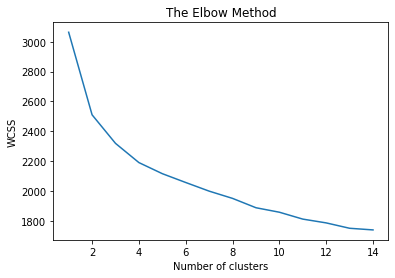

In [15]:
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.lineplot(range(1,15),wcss)


Using elbow method we are selecting 4

In [16]:
kmeans = KMeans(n_clusters= 4, random_state=0) 
y_kmeans = kmeans.fit_predict(frms)

In [17]:
forums['k_mean4_cluster'] = y_kmeans

In [18]:
forums

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,...,e291,e292,e293,e294,e295,e296,e297,e298,e299,k_mean4_cluster
0,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,Didn't one of the early jet fighters have thes...,-0.032947,0.120877,-0.075873,-0.076834,-0.005793,0.006867,-0.043206,-0.026466,0.005214,...,0.015210,0.031759,-0.070944,0.075598,-0.020428,-0.045896,-0.004107,0.052477,0.120896,3
2,"I bought my HP48sx calculator a month ago, use...",-0.057366,0.190520,-0.100694,-0.121314,0.073766,-0.007092,-0.047218,-0.166004,0.072910,...,-0.006750,-0.009741,-0.039333,-0.042368,-0.059894,-0.006622,-0.090851,0.045055,0.062297,0
3,I would guess not. Dr. Neil Gehrels of CGRO i...,-0.032504,0.165183,-0.101052,-0.018943,0.060833,0.039176,-0.045718,-0.111591,-0.028218,...,0.041819,0.030946,-0.029487,0.051459,0.040399,-0.025781,-0.011279,0.002328,0.011600,3
4,Okay all my friends are bitching at me that th...,-0.047674,0.158548,-0.155047,-0.043119,0.045485,0.017984,0.045940,-0.143726,-0.023209,...,-0.001017,-0.029828,-0.049135,0.066774,-0.029746,-0.040265,-0.068277,0.032159,0.106702,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,SOmebody mentioned a re-boost of HST during t...,-0.017313,0.151124,-0.097467,-0.005759,0.060373,0.037662,-0.038686,-0.102998,-0.031477,...,0.013322,0.008926,-0.052918,-0.014198,-0.014283,-0.018254,-0.054706,0.009321,0.048087,0
2358,"Hi,well I have opened up a FTP site for gettin...",-0.006931,0.135477,-0.179861,-0.077442,0.122345,0.021415,0.035423,-0.158642,0.016376,...,0.023453,-0.034901,-0.009663,0.101828,-0.063073,-0.017405,-0.064170,-0.018364,0.124396,0
2359,"Ok guys, I need a list of the teams who have b...",0.004231,0.141498,-0.165579,-0.064688,0.099878,-0.040249,0.069714,-0.097506,0.040415,...,0.006024,-0.099165,-0.086234,0.082945,-0.029348,-0.123697,-0.116095,0.056622,0.050325,3
2360,Two years old Crate Guitar Amplifier model G80...,0.019107,0.370065,-0.044511,-0.100988,0.137583,-0.018037,0.067546,-0.147596,-0.065580,...,-0.042133,0.016216,0.059849,-0.055886,0.058791,0.056025,-0.013995,0.040133,-0.063293,1
